In [1]:
 import numpy as np
 import matplotlib.pyplot as plt
 import pandas as pd
 from astropy.constants import G, c
 from astropy.cosmology import Planck18 as cosmo
 import astropy.units as u
 from astropy.cosmology import FlatLambdaCDM
 H0 = cosmo.H0.value * 1000 / 3.086e22
 q0=-0.534

In [2]:
df=pd.read_csv(r"D:\Avani\ISA summer school\Dynamical mass.csv")

In [3]:
averaged_df = df.groupby('objid').agg({'specz': 'mean','ra': 'first','dec': 'first','proj_sep': 'first',}).reset_index()
averaged_df.describe()['specz']

count    6.000000
mean     0.079817
std      0.001557
min      0.077056
25%      0.079677
50%      0.080069
75%      0.080265
max      0.081833
Name: specz, dtype: float64

In [4]:
mean=df["specz"].mean()
sd=df["specz"].std()
lower_limit= mean - 3*sd
upper_limit=mean + 3*sd

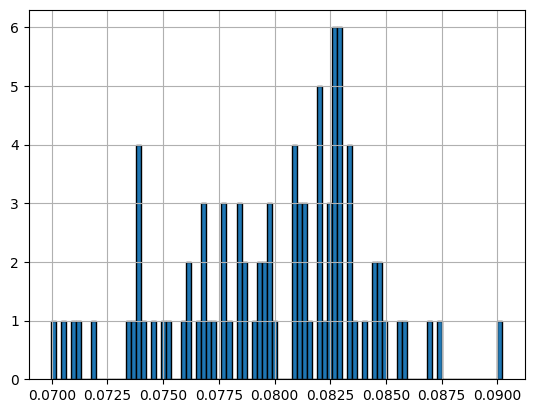

Text(0.5, 1.0, 'distribution of redshift for this data')

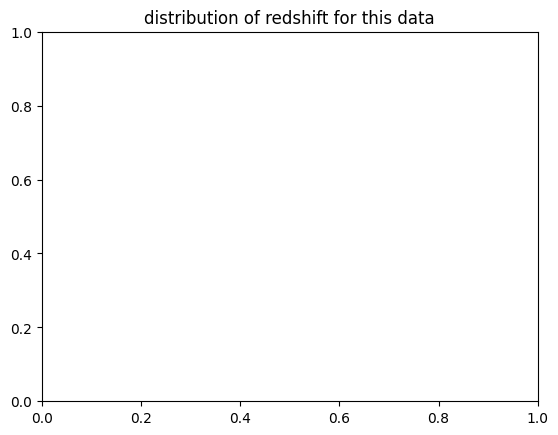

In [15]:

plt.hist(df['specz'], bins=90, edgecolor='black')
plt.grid()
plt.show()
plt.title("distribution of redshift for this data")

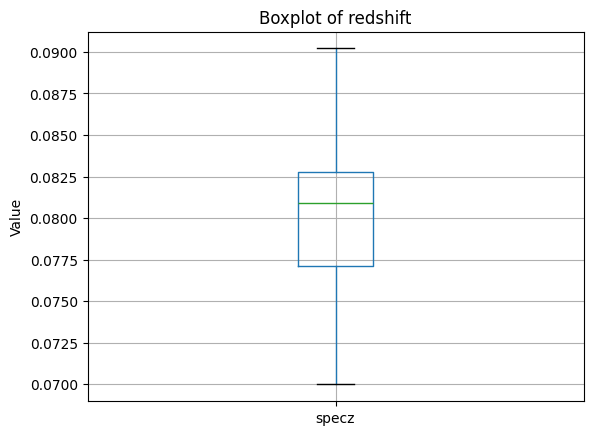

In [6]:
df.boxplot(column='specz')
plt.title("Boxplot of redshift")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [7]:
df = df.drop_duplicates(subset='ra')
filtered_df = df[(df['specz'] >= lower_limit) & (df['specz'] <= upper_limit)]
cluster_redshift = filtered_df['specz'].mean()
filtered_df.count()

objid        90
ra           90
dec          90
photoz       90
photozerr    90
specz        90
speczerr     90
proj_sep     90
umag         90
umagerr      90
gmag         90
gmagerr      90
rmag         90
rmagerr      90
obj_type     90
velocity     90
dtype: int64

In [8]:
cluster_redshift = filtered_df['specz'].mean()
df['velocity'] = c.value * (
    ((1 + df['specz'])**2 - (1 + cluster_redshift)**2) /
    ((1 + df['specz'])**2 + (1 + cluster_redshift)**2))
disp = df['velocity'].std()  # Standard deviation of velocit


In [9]:
df.to_csv(r"D:/Avani/ISA summer school/Dynamical mass.csv", index=False) #updates the new velocity column 

In [10]:
print(f"The value of the cluster redshift = {cluster_redshift:.4}")
print(f"The characteristic value of velocity dispersion of the cluster along the line of sight = {disp:.4} km/s.")

The value of the cluster redshift = 0.07989
The characteristic value of velocity dispersion of the cluster along the line of sight = 1.14e+06 km/s.


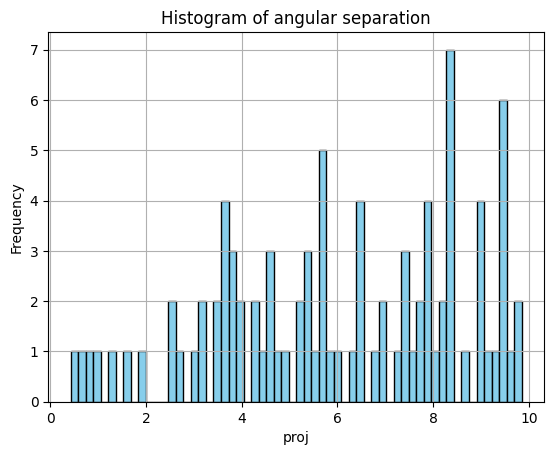

In [16]:
plt.hist(df['proj_sep'], bins=60, color='skyblue', edgecolor='black')
plt.title("Histogram of angular separation")
plt.xlabel("proj")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [12]:
z = cluster_redshift 
r = (c.value * z / H0) * (1 - (z / 2) * (1 + q0)) 
DA = r / (1 + z)  
df['theta_rad'] = df['proj_sep'] * np.pi / (180 * 60)
df['diameter_Mpc'] = DA * df['theta_rad']

In [13]:
M_dyn =3*((disp*1000)**2)*(DA*0.5*10**6*3*10**16)/(G*2*10**30)

print(f"Dynamical Mass of the cluster is {M_dyn:.2e} solar mass")

Dynamical Mass of the cluster is 4.35e+45 s2 kg / m3 solar mass


In [14]:
M_sun = 4.65
Upsilon = 3
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
mask = (df['specz'].notna()) & (df['rmag'].notna()) & (df['specz'] > 0)
z_vals = df.loc[mask, 'specz']
d_L = cosmo.luminosity_distance(z_vals).to('pc').value
m_vals = df.loc[mask, 'rmag']
M_r = m_vals - 5 * np.log10(d_L) + 5
L = 10 ** (-0.4 * (M_r - M_sun))
df.loc[mask, 'luminous_mass'] = Upsilon * L
